<a href="https://colab.research.google.com/github/MeghanaSen/-HD5210-homework-/blob/main/Another_copy_of_week10_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

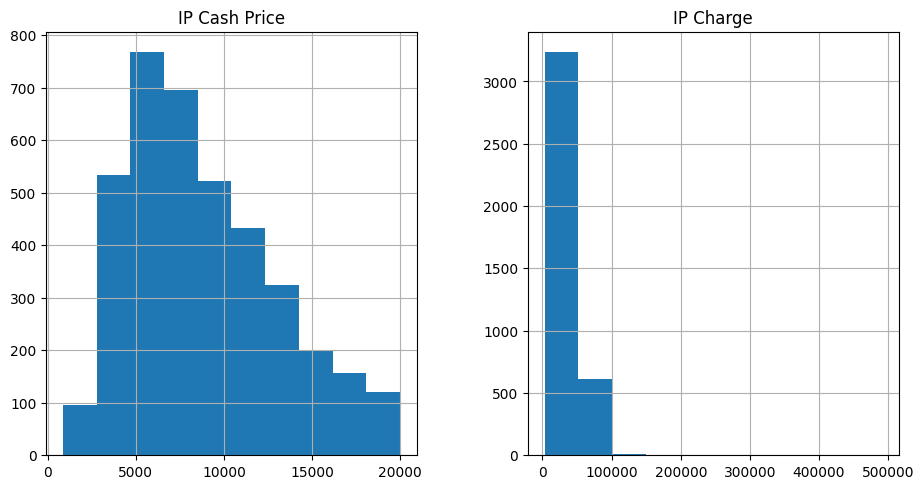

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

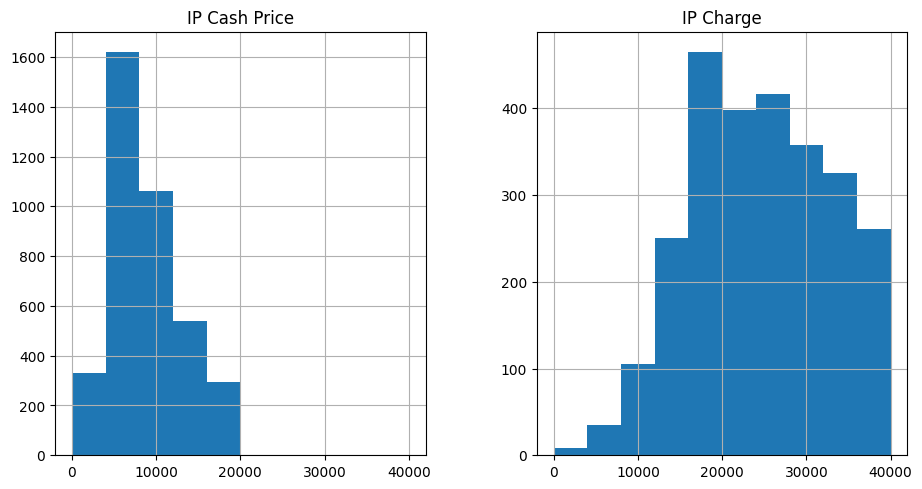

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

The histogram offers a detailed visualization of the distribution of cash prices and charges for inpatient (IP) medical services, illustrating how frequently different pricing levels occur. Most of the bars in the histogram are clustered on the lower end, particularly below $10,000, highlighting that the majority of inpatient services fall within a relatively affordable range. This concentration of lower values implies that common inpatient treatments, such as routine procedures or shorter hospital stays, tend to be less costly, making them more frequent in the dataset.

In contrast, the histogram also shows a few bars representing prices and charges exceeding $30,000, signifying that a smaller number of inpatient cases come with significantly higher costs. These high-cost cases typically correspond to complex procedures, longer hospitalizations, or specialized treatments that demand extensive resources and specialized medical expertise. The scarcity of these high-cost cases compared to lower-cost ones creates a pattern known as a "right-skewed" distribution, where most values lie at the lower end of the price range, while a "tail" stretches out to the right, representing less frequent but much higher charges.

This rightward skew is indicative of the healthcare industry’s cost structure, where the majority of patients require relatively affordable treatments, while a few undergo very expensive care. The skewed distribution in the histogram highlights the variability of inpatient care costs, with most cases falling within a modest price range but a select few reaching substantial expenses. In summary, the histogram reveals that while the majority of inpatient services are relatively affordable, a small number of costly outliers extend the distribution to the right, underscoring both the affordability of routine care and the potential for high costs in more complex cases.


---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

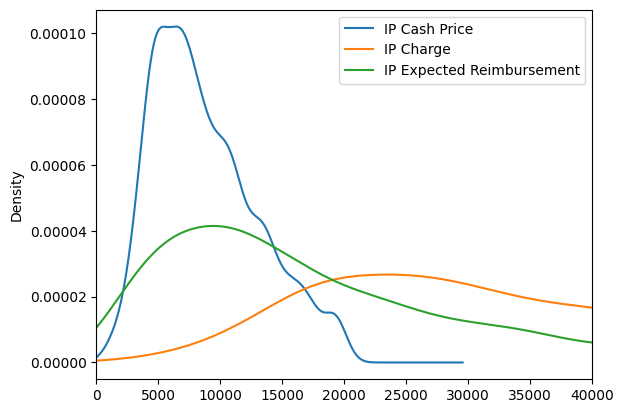

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company


Here's your analysis combined into a single paragraph:

The analysis of the IP cash price, represented by the blue line, indicates that when paying out of pocket without insurance, most procedures tend to cost between $5,000 and $10,000, as shown by the curve peaking in this range and sharply declining beyond $10,000. In contrast, the IP charge, depicted by the green line, reflects the maximum amount hospitals will charge an insurance company. This curve demonstrates a broader distribution, peaking after $10,000 and gradually decreasing, suggesting that charges for procedures tend to cluster around this higher price range when insurance is utilized. Lastly, the IP expected reimbursement, illustrated by the orange line, presents a different distribution, starting with a high density at the lower end (around $0) and decreasing as expected reimbursement increases. This indicates that many services or procedures are likely to receive low reimbursement amounts, particularly at the lower end of the scale.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


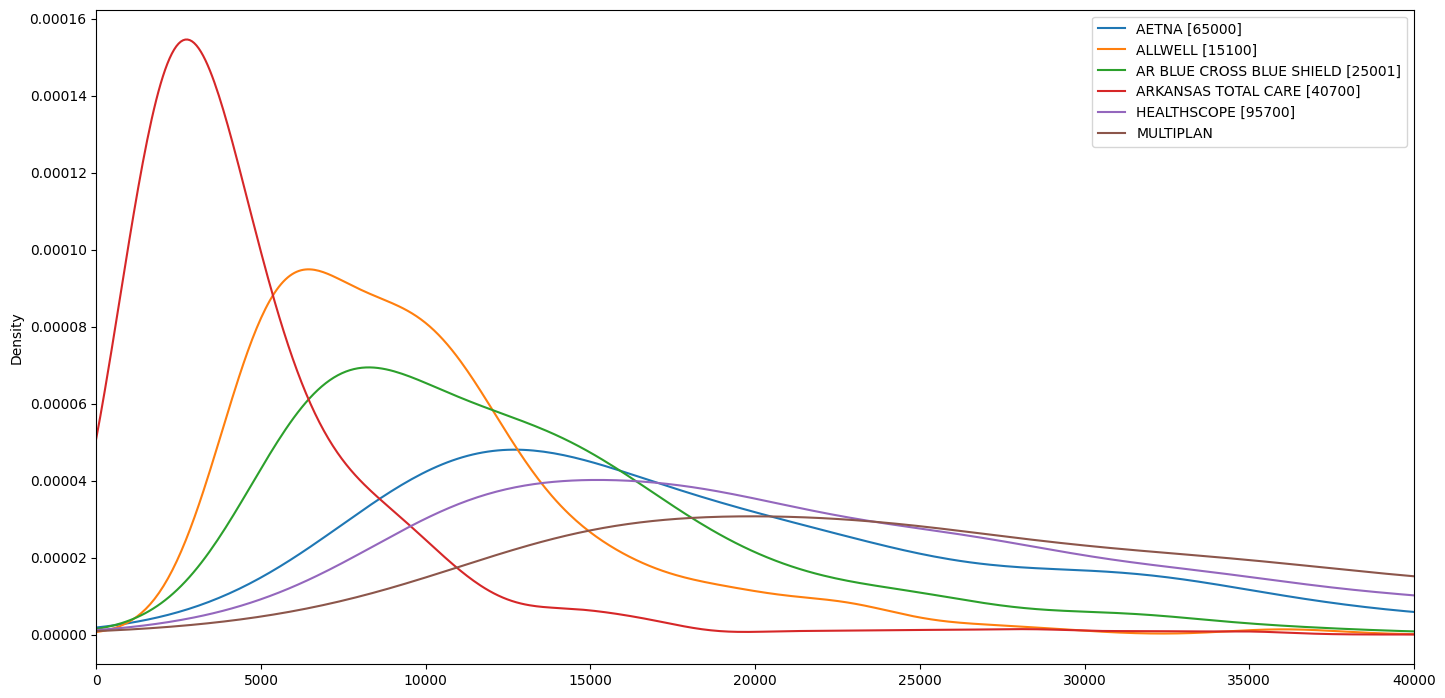

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


The Kernel Density Estimation (KDE) plots reveal distinct pricing tiers for inpatient services based on who pays—uninsured patients paying cash versus insurers with negotiated rates. Cash prices for uninsured patients peak at a lower rate than the hospital's full charges, indicating a modest discount, though these patients still face substantial costs. Insurance reimbursements, however, peak even lower, highlighting the deep discounts insurers secure through negotiation.

This separation in peaks illustrates a tiered pricing structure: full charges are the highest, cash prices are moderately discounted, and insurance rates are the lowest. The KDE analysis emphasizes the impact of negotiated rates, with insured patients benefiting from the lowest costs, while uninsured patients pay closer to the hospital’s full charges. This structure highlights the significant cost differences based on payer type.

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

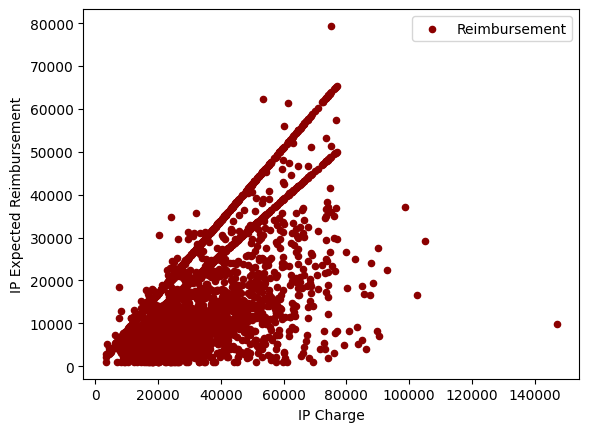

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

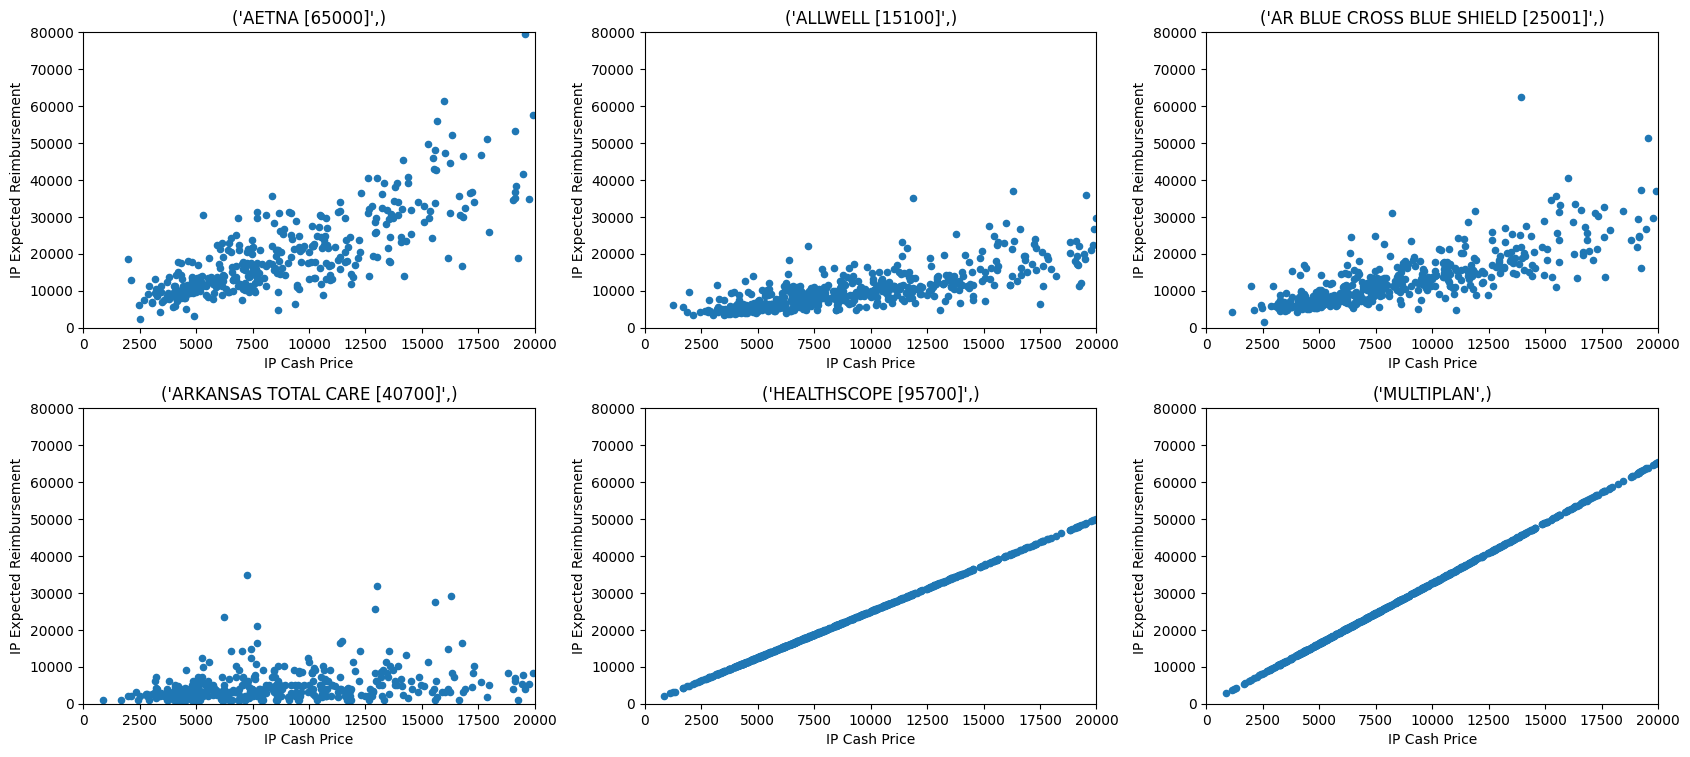

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

The KDE plots for expected reimbursements reveal typical reimbursement patterns for various insurers by showing the distribution of payment amounts each insurer tends to make. The peak of each KDE curve represents the most common reimbursement amount for that payer, indicating the values they typically reimburse based on past data. Insurers like Aetna and BCBS have KDE peaks at lower values, suggesting they use strong negotiating power to secure lower rates. In contrast, insurers like Allwell show higher peaks, implying different strategies that lead to higher average reimbursements. This comparison illustrates how each insurer’s approach affects the payments made to healthcare providers.

---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [ ]:
#pip install matplotlib
import pandas as pd

# reading the database
data = pd.read_csv("edited_us_air_quality_one_week_2022_06_23.csv")

# printing the top 10 rows
display(data.head(10))


,location,city,country,pollutant,value,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,date,time
0,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-26,05:00:00
1,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.68,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-19,07:00:00
2,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.63,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,20:00:00
3,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.86,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-20,04:00:00
4,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.33,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,10:00:00
5,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.23,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-24,07:00:00
6,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,1.96,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-19,13:00:00
7,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.72,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-23,04:00:00
8,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,2.48,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-20,20:00:00
9,MILWAUKEE COLLEGE AV,Milwaukee-Waukesha-West Allis,US,bc,0.23,µg/m³,AirNow,1,42.93257,-87.93434,POINT(42.93257 1),2022-05-25,07:00:00


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time'].value_counts()
    for x_label, grp in _df_11.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='value', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='value', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

This code loads the air quality data and displays the first 10 rows. This helps in getting a quick overview of the data, including columns like date, location, pollutant type, and pollutant values.


In [ ]:
print(data.columns)


Index(['location', 'city', 'country', 'pollutant', 'value', 'unit',
       'source_name', 'latitude', 'longitude', 'averaged_over_in_hours',
       'location_geom', 'date', 'time'],
      dtype='object')


This scatter plot shows how pollutant levels (value) change over time (date). Each point represents the pollution level on a specific day, helping to identify any trends or outliers in air quality over the observed week.
This scatter plot adds color and size to represent different pollutants and sources. This allows us to see not only how pollution values vary over time but also compare different pollutants and sources visually.
This line plot compares pollutant levels across cities. While it’s intended to show trends for different cities, indexing on cities as labels may not effectively convey the data, as city names are categorical. Adjusting to group by city may make this visualization more meaningful.
This bar chart represents pollutant levels by date. Bars allow for a clear comparison of pollution levels across the week, highlighting days with high or low pollution levels.
